In [53]:
#importing packages
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import os   
from zipfile import ZipFile
from data_API_downloader import Downloader
from region_splitter import Region_finder
import geopandas
from shapely import geometry
from shapely.geometry import Point
import folium

In [2]:
download = Downloader(2020,11)

In [3]:
download.get_request()

200


In [46]:
data = download.unzip_files_return_dataframe()

In [47]:
data.head()

,id,x,y,mp,date,state,relevance,types
0,13990318,14.432970,50.060746,False,2020-11-02T16:58:00.0000+01:00,1,2,1
1,13990318,14.432970,50.060746,False,2020-11-02T16:58:00.0000+01:00,1,2,9
2,13990318,14.432970,50.060746,False,2020-11-02T16:58:00.0000+01:00,1,2,90
3,13990318,14.432970,50.060746,False,2020-11-02T16:58:00.0000+01:00,1,2,96
4,14022607,14.401882,50.068808,False,2020-11-09T08:12:00.0000+01:00,1,4,55


In [30]:
geojson = geopandas.read_file("ORP_P.shp")
geojson.crs


<Projected CRS: EPSG:5514>
Name: S-JTSK / Krovak East North
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Europe - Czechoslovakia
- bounds: (12.09, 47.73, 22.56, 51.06)
Coordinate Operation:
- name: Krovak East North (Greenwich)
- method: Krovak (North Orientated)
Datum: System of the Unified Trigonometrical Cadastral Network
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [31]:
reprojected = geojson.to_crs(epsg=4326)
reprojected

,KOD,NAZEV,OKRES_KOD,NUTS3_KOD,SPR_OB_KOD,geometry
0,761,Kadaò,3503,CZ042,563102,"POLYGON ((13.43356 50.36894, 13.43005 50.36210..."
1,779,Jablonec nad Nisou,3504,CZ051,563510,"POLYGON ((15.15200 50.84060, 15.16443 50.84090..."
2,787,Tanvald,3504,CZ051,563820,"POLYGON ((15.23190 50.82697, 15.24458 50.82463..."
3,795,elezný Brod,3504,CZ051,563871,"POLYGON ((15.32375 50.67244, 15.32655 50.66461..."
4,809,Frýdlant,3505,CZ051,564028,"POLYGON ((14.99442 50.86943, 15.00204 50.86884..."
...,...,...,...,...,...,...
201,2020,umperk,3809,CZ071,523704,"POLYGON ((16.76835 50.00715, 16.76689 50.01675..."
202,2038,Ronov pod Radhotìm,3810,CZ072,544841,"POLYGON ((18.07115 49.41971, 18.06935 49.43087..."
203,2046,Valaské Meziøíèí,3810,CZ072,545058,"POLYGON ((17.85869 49.40424, 17.83913 49.42309..."
204,2054,Vsetín,3810,CZ072,541630,"POLYGON ((18.07115 49.41971, 18.09172 49.40522..."


In [48]:
data["ORP"] = np.nan
data["points"] = data.apply(lambda row: Point(row["x"],row["y"]),axis=1)



c:\Users\tomas\anaconda3\envs\PROJECT_CRIMINALITY\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [50]:
data

,id,x,y,mp,date,state,relevance,types,ORP,points
0,13990318,14.432970,50.060746,False,2020-11-02T16:58:00.0000+01:00,1,2,1,Hlavní mìsto Praha,POINT (14.43297 50.060746)
1,13990318,14.432970,50.060746,False,2020-11-02T16:58:00.0000+01:00,1,2,9,Hlavní mìsto Praha,POINT (14.43297 50.060746)
2,13990318,14.432970,50.060746,False,2020-11-02T16:58:00.0000+01:00,1,2,90,Hlavní mìsto Praha,POINT (14.43297 50.060746)
3,13990318,14.432970,50.060746,False,2020-11-02T16:58:00.0000+01:00,1,2,96,Hlavní mìsto Praha,POINT (14.43297 50.060746)
4,14022607,14.401882,50.068808,False,2020-11-09T08:12:00.0000+01:00,1,4,55,Hlavní mìsto Praha,POINT (14.401882 50.068808)
...,...,...,...,...,...,...,...,...,...,...
292322,20336004,14.472933,50.103085,False,2020-11-17T11:11:00.0000+01:00,2,4,80,Hlavní mìsto Praha,POINT (14.472933 50.103085)
292323,20336004,14.472933,50.103085,False,2020-11-17T11:11:00.0000+01:00,2,4,81,Hlavní mìsto Praha,POINT (14.472933 50.103085)
292324,20493032,15.186934,50.022730,False,2020-11-25T09:00:00.0000+01:00,1,4,78,Kolín,POINT (15.186934 50.02273)
292325,20493032,15.186934,50.022730,False,2020-11-25T09:00:00.0000+01:00,1,4,97,Kolín,POINT (15.186934 50.02273)


In [49]:

for indx,point in enumerate(data["points"]):
    for region_name,polygon in zip(reprojected["NAZEV"],reprojected["geometry"]):
        if point.within(polygon):
            data.iloc[indx,8] = region_name
data


,id,x,y,mp,date,state,relevance,types,ORP,points
0,13990318,14.432970,50.060746,False,2020-11-02T16:58:00.0000+01:00,1,2,1,Hlavní mìsto Praha,POINT (14.43297 50.060746)
1,13990318,14.432970,50.060746,False,2020-11-02T16:58:00.0000+01:00,1,2,9,Hlavní mìsto Praha,POINT (14.43297 50.060746)
2,13990318,14.432970,50.060746,False,2020-11-02T16:58:00.0000+01:00,1,2,90,Hlavní mìsto Praha,POINT (14.43297 50.060746)
3,13990318,14.432970,50.060746,False,2020-11-02T16:58:00.0000+01:00,1,2,96,Hlavní mìsto Praha,POINT (14.43297 50.060746)
4,14022607,14.401882,50.068808,False,2020-11-09T08:12:00.0000+01:00,1,4,55,Hlavní mìsto Praha,POINT (14.401882 50.068808)
...,...,...,...,...,...,...,...,...,...,...
292322,20336004,14.472933,50.103085,False,2020-11-17T11:11:00.0000+01:00,2,4,80,Hlavní mìsto Praha,POINT (14.472933 50.103085)
292323,20336004,14.472933,50.103085,False,2020-11-17T11:11:00.0000+01:00,2,4,81,Hlavní mìsto Praha,POINT (14.472933 50.103085)
292324,20493032,15.186934,50.022730,False,2020-11-25T09:00:00.0000+01:00,1,4,78,Kolín,POINT (15.186934 50.02273)
292325,20493032,15.186934,50.022730,False,2020-11-25T09:00:00.0000+01:00,1,4,97,Kolín,POINT (15.186934 50.02273)


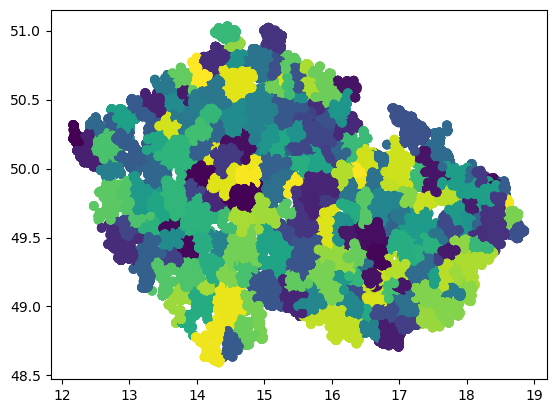

In [51]:
def dfScatter(df, xcol='x', ycol='y', catcol='ORP'):
    fig, ax = plt.subplots()
    categories = np.unique(df[catcol])
    colors = np.linspace(0, 1, len(categories))
    colordict = dict(zip(categories, colors))  

    df["Color"] = df[catcol].apply(lambda x: colordict[x])
    ax.scatter(df[xcol], df[ycol], c=df.Color)
    return fig

fig = dfScatter(data)



In [115]:
counts = data["ORP"].value_counts().to_frame()
counts.reset_index(inplace=True)
counts = counts.rename(columns = {'index':'ORP',"ORP":"counts"})
counts


,ORP,counts
0,Hlavní mìsto Praha,34722
1,Ostrava,11735
2,Brno,11509
3,Jihlava,5392
4,Liberec,4667
...,...,...
201,Milevsko,160
202,Sedlèany,155
203,Nová Paka,153
204,Králíky,152


In [116]:
table = reprojected.merge(counts,how="right",left_on=["NAZEV"],right_on=["ORP"])
table

,KOD,NAZEV,OKRES_KOD,NUTS3_KOD,SPR_OB_KOD,geometry,ORP,counts
0,19,Hlavní mìsto Praha,9999,CZ010,554782,"POLYGON ((14.30240 50.12997, 14.30240 50.13000...",Hlavní mìsto Praha,34722
1,1961,Ostrava,3807,CZ080,554821,"POLYGON ((18.39963 49.81003, 18.40707 49.80374...",Ostrava,11735
2,1317,Brno,3702,CZ064,582786,"POLYGON ((16.62658 49.11017, 16.62632 49.10991...",Brno,11509
3,1503,Jihlava,3707,CZ063,586846,"POLYGON ((15.63038 49.20227, 15.62092 49.19883...",Jihlava,5392
4,817,Liberec,3505,CZ051,563889,"POLYGON ((15.11364 50.65194, 15.09614 50.64659...",Liberec,4667
...,...,...,...,...,...,...,...,...
201,396,Milevsko,3305,CZ031,549576,"POLYGON ((14.39727 49.32635, 14.38893 49.32964...",Milevsko,160
202,264,Sedlèany,3211,CZ020,541281,"POLYGON ((14.51912 49.69230, 14.52744 49.68618...",Sedlèany,155
203,1023,Nová Paka,3604,CZ052,573248,"POLYGON ((15.42797 50.48416, 15.43227 50.49181...",Nová Paka,153
204,1236,Králíky,3611,CZ053,580481,"POLYGON ((16.70556 50.03140, 16.70421 50.03712...",Králíky,152


In [118]:
my_map = folium.Map(location = [49.5,15.5],zoom_start = 8.4)
my_map


In [119]:
folium.Choropleth(
    geo_data=table,
    data=table,
    columns=["ORP", "counts"],
    key_on="feature.properties.ORP",
    fill_color="PuBu",
    bins=[0,200,500,1000,5000,50000],
    highlight=True,
).add_to(my_map)

In [120]:
my_map